# Projeto: Jogada-Jogada NBB

## def

In [1]:
def siglas(nome_time):
    if nome_time == 'Bauru':
        return 'BAU'
    elif nome_time == 'Mogi das Cruzes':
        return 'MOG'
    elif nome_time == 'VipTech CMB':
        return 'CMO'
    elif nome_time == 'Flamengo':
        return 'FLA'
    elif nome_time == 'Minas':
        return 'MIN'
    elif nome_time == 'UNIFACISA':
        return 'UFC'
    elif nome_time == 'Cerrado Basquete':
        return 'CER'
    elif nome_time == 'Sesi Franca':
        return 'FRA'
    elif nome_time == 'Corinthians':
        return 'COR'
    elif nome_time == 'Pinheiros':
        return 'PIN'
    elif nome_time == 'KTO Caxias do Sul':
        return 'CAX'
    elif nome_time == 'Pato Basquete':
        return 'PAT'
    elif nome_time == 'São Paulo':
        return 'SPF'
    elif nome_time == 'Rio Claro':
        return 'RCB'
    elif nome_time == 'São José':
        return 'SJO'
    elif nome_time == 'Botafogo':
        return 'BOT'
    elif nome_time == 'Vasco da Gama':
        return 'VAS'
    elif nome_time == 'Joinville   AABJ ':
        return 'JLE'
    elif nome_time == 'Palmeiras':
        return 'PAL'
    elif nome_time == 'Uberlândia':
        return 'UBE'
    elif nome_time == 'Limeira':
        return 'LIM'
    elif nome_time == 'Vitória':
        return 'VIT'
    elif nome_time == 'Liga Sorocabana':
        return 'LSB'
    elif nome_time == 'Caxias do Sul':
        return 'CAX'
    elif nome_time == 'Macaé Basquete':
        return 'MAC'
    elif nome_time == 'Espírito Santo':
        return 'ESB'
    elif nome_time == 'Goiânia':
        return 'GOI'
    elif nome_time == 'Brasília':
        return 'BRA'
    elif nome_time == 'Fortaleza Basquete':
        return 'CEA'
    elif nome_time == 'Paulistano':
        return 'CAP'
    elif nome_time == 'Basquete Cearense':
        return 'CEA'

## ...

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

Colunas:
* Quartos
* Tempo
* placar_casa
* placar_visitante
* Nome
*


Coluna Indicadores técnicos:

* fim_quarto -> Fim de quarto (qualquer quarto)
* inicio_quarto -> Inicio de quarto (qualquer quarto)
* fim_partida  -> Fim da Partida
* incio partida -> Inicio da Partida
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* Pts_3_T    -> Três Pontos Tentados
* Pts_2_C    -> Dois Pontos Convertidos
* Pts_2_T    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FC_T         -> Faltas Técnica
* FC_A         -> Faltas Antidesportiva
* FC_O       -> Faltas Ofensiva
* FC_D        -> Faltas Desqualificante
* Entra       -> Entrada na Substituição 
* Sai           -> Saida na Substituição 
* tempo_tecnico -> Tempo Técnico
* ER         -> Erros
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

## Bibliotecas

In [2]:
# !pip install dataframe_image

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import re
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
from fpdf import FPDF
from funcoes_relatorio_analises1 import *

## Jogos

In [4]:
# arquivo = "tabela_1_VipTech CMB_x_Fortaleza B.csv"
# arquivo = "tabela_2_Flamengo_x_Minas.csv"
# arquivo = "tabela_3_UNIFACISA_x_VipTech CMB.csv"
# arquivo = "tabela_6_Minas_x_Pato Basquete.csv"
# arquivo = "tabela_79_Brasília_x_Flamengo.csv"

In [5]:
arquivo = "Brasília_x_Rio Claro.csv"
# erro 5

In [6]:
# df = pd.read_csv("tabela_1_VipTech CMB_x_Fortaleza B. C.1.csv")

## Código

In [7]:
df = pd.read_csv(arquivo)
# Substituir algum nome de time que esteja diferente do padrão
df.replace(to_replace='BRB/Brasília', value='Brasília', inplace=True)
df.replace(to_replace='Rio Claro/ABDC', value='Rio Claro', inplace=True)

In [8]:
expressao_regular = re.findall(r'[A-Z].*?[.]', arquivo)
expressao_regular = str(expressao_regular).strip("['.']").split('_x_')
expressao_regular

['Brasília', 'Rio Claro']

### criar um df que identifique o Mogi e colocar mogi das cruzes 

In [9]:
nome_time_casa = expressao_regular[0]
nome_time_casa

'Brasília'

In [10]:
nome_time_fora = expressao_regular[1]
nome_time_fora

'Rio Claro'

## Precisa colocar algumas informações básicas sobre o jogo para que completar a tabela 

In [11]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,68,63,NaN,fim_partida,NaN
1,1,4,00:00,68,63,NaN,fim_quarto,NaN
2,2,4,00:02,68,63,BRA,RD,Suassuna
3,3,4,00:02,68,63,RCB,2_Pts_T,Augusto
4,4,4,00:04,68,63,RCB,RO,Augusto
...,...,...,...,...,...,...,...,...
591,591,1,10:00,0,0,BRA,substituicao_entra,Felipe
592,592,1,10:00,0,0,BRA,substituicao_entra,Cadu
593,593,1,10:00,0,0,BRA,substituicao_entra,Aguiar
594,594,1,10:00,0,0,BRA,substituicao_entra,Gabriel


# Informações básicas sobre o jogo 

In [12]:
data_hoje = datetime.today().strftime('%d/%m/%Y')
dia_do_jogo = '02/01/2021'
temporada = 2019
sigla_time_a = siglas(nome_time_casa)
sigla_time_b = siglas(nome_time_fora)
casa = 'casa'
fora = 'fora'
classificatoria = '1 Turno'

In [13]:
sigla_time_a

'BRA'

In [14]:
sigla_time_b

'RCB'

In [15]:
arquivo = 'RELATORIO'
arquivo1 = f'informacoes_dos_times/{nome_time_casa}'
arquivo2 = f'informacoes_dos_times/{nome_time_fora}'
img_casa = f'{arquivo1}/{nome_time_casa}'
img_fora = f'{arquivo2}/{nome_time_fora}'

In [16]:
dia_do_jogo

'02/01/2021'

# Limpeza dos dados 

* primeiro evitar NAN (acredite!!! tem isso no site)

In [17]:
df.dropna(subset=['Tempo'], inplace=True)

* mudança do tempo
* colocar todos em segundos para facilitar a vida
* tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
* para isso localizei o valores errados e concertei

In [18]:
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [19]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [20]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [21]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [22]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [23]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 4.5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 5.5)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [24]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

In [25]:
# Acrescentado colunas
# diferenca_placar_casa
# diferenca_placar_visitante
df['diferenca_placar_casa'] = df['placar_casa'] - df['placar_visitante']
df['diferenca_placar_visitante'] = df['placar_visitante'] - df['placar_casa']
df["diferenca_placar_absoluto"] = df.loc[:, "diferenca_placar_casa"].abs()
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,4,2400,68,63,NaN,fim_partida,NaN,5,-5,5
1,4,2400,68,63,NaN,fim_quarto,NaN,5,-5,5
2,4,2398,68,63,BRA,RD,Suassuna,5,-5,5
3,4,2398,68,63,RCB,2_Pts_T,Augusto,5,-5,5
4,4,2396,68,63,RCB,RO,Augusto,5,-5,5
...,...,...,...,...,...,...,...,...,...,...
591,1,0,0,0,BRA,substituicao_entra,Felipe,0,0,0
592,1,0,0,0,BRA,substituicao_entra,Cadu,0,0,0
593,1,0,0,0,BRA,substituicao_entra,Aguiar,0,0,0
594,1,0,0,0,BRA,substituicao_entra,Gabriel,0,0,0


# Análise da pontuação dos times

In [26]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') |
               (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
               (df['Indicador'] == 'LL_Pts_C')| (df['Indicador'] == 'LL_Pts_T') |
               (df['Indicador'] == 'EN')|
               (df['Indicador'] == 'fim_partida')]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,4,2400,68,63,NaN,fim_partida,NaN,5,-5,5
3,4,2398,68,63,RCB,2_Pts_T,Augusto,5,-5,5
5,4,2396,68,63,RCB,3_Pts_T,Arthur,5,-5,5
9,4,2395,68,63,BRA,LL_Pts_C,Breno,5,-5,5
10,4,2395,67,63,BRA,LL_Pts_C,Breno,4,-4,4
...,...,...,...,...,...,...,...,...,...,...
576,1,61,0,0,BRA,2_Pts_T,Gabriel,0,0,0
578,1,50,0,0,RCB,2_Pts_T,Arthur,0,0,0
580,1,43,0,0,BRA,3_Pts_T,Breno,0,0,0
582,1,28,0,0,RCB,2_Pts_T,Eltinho,0,0,0


In [27]:
# estamos invertendo os valores para deixar parecido com o jogo
pontuacao = pontuacao[::-1]
pontuacao.reset_index(drop=True, inplace=True)
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,1,13,0,0,RCB,3_Pts_T,Arthur,0,0,0
1,1,28,0,0,RCB,2_Pts_T,Eltinho,0,0,0
2,1,43,0,0,BRA,3_Pts_T,Breno,0,0,0
3,1,50,0,0,RCB,2_Pts_T,Arthur,0,0,0
4,1,61,0,0,BRA,2_Pts_T,Gabriel,0,0,0
...,...,...,...,...,...,...,...,...,...,...
184,4,2395,67,63,BRA,LL_Pts_C,Breno,4,-4,4
185,4,2395,68,63,BRA,LL_Pts_C,Breno,5,-5,5
186,4,2396,68,63,RCB,3_Pts_T,Arthur,5,-5,5
187,4,2398,68,63,RCB,2_Pts_T,Augusto,5,-5,5


In [28]:
# colocar a separação dos quartos nos gráficos
quartos_duplicados = df['Quarto'].unique()
if len(quartos_duplicados) == 4:
    quartos = [600, 1200, 1800, 2400]
elif len(quartos_duplicados) == 5:
    quartos = [600, 1200, 1800, 2400, 2700]
elif len(quartos_duplicados) == 6:
    quartos = [600, 1200, 1800, 2400, 2700, 3000]
elif len(quartos_duplicados) == 7:
    quartos = [600, 1200, 1800, 2400, 2700, 3300]

# Gráfico

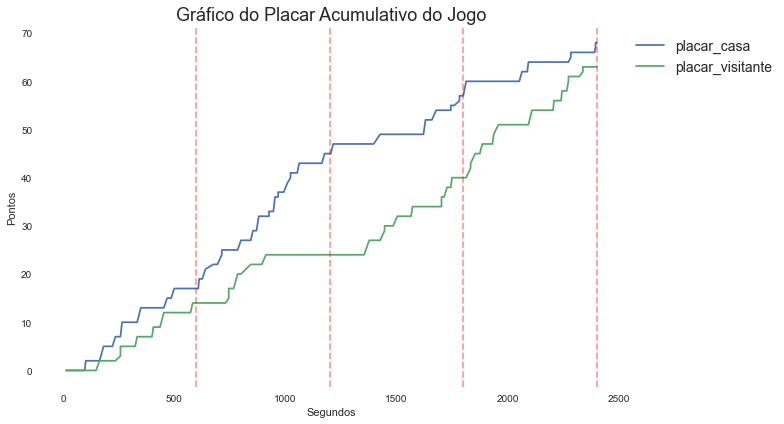

In [29]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(11,6))
tempo = pontuacao['Tempo']
pontuacao1 = pontuacao['placar_casa']
pontuacao2 = pontuacao['placar_visitante']
plt.plot(tempo, pontuacao1, label='placar_casa')
plt.plot(tempo, pontuacao2, label='placar_visitante')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.title('Gráfico do Placar Acumulativo do Jogo', fontsize=18)
plt.ylabel('Pontos')
plt.xlabel('Segundos')
plt.tight_layout()
plt.savefig('RELATORIO/teste.jpeg', format='jpg')

# Análise da Posse de Bola dos times

In [30]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_T') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'FC_O')|                
                (df['Indicador'] == 'EN') | (df['Indicador'] == 'fim_partida')]

In [31]:
# estamos invertendo os valores para deixar parecido com o jogo
posse_bola = posse_bola[::-1]
posse_bola.reset_index(drop=True, inplace=True)
posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante,diferenca_placar_absoluto
0,1,13,0,0,RCB,3_Pts_T,Arthur,0,0,0
1,1,28,0,0,RCB,2_Pts_T,Eltinho,0,0,0
2,1,43,0,0,BRA,3_Pts_T,Breno,0,0,0
3,1,50,0,0,RCB,2_Pts_T,Arthur,0,0,0
4,1,61,0,0,BRA,2_Pts_T,Gabriel,0,0,0
...,...,...,...,...,...,...,...,...,...,...
237,4,2395,67,63,BRA,LL_Pts_C,Breno,4,-4,4
238,4,2395,68,63,BRA,LL_Pts_C,Breno,5,-5,5
239,4,2396,68,63,RCB,3_Pts_T,Arthur,5,-5,5
240,4,2398,68,63,RCB,2_Pts_T,Augusto,5,-5,5


In [32]:
sigla_time_b

'RCB'

In [33]:
sigla_time_a

'BRA'

In [34]:
lstime_b = [[]]
lstime_a = [[]]

for a in posse_bola.itertuples():
    if a.Time not in [sigla_time_b]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
                cc.diferenca_placar_absoluto
            ]
            lstime_b.append(lss)
        else:
            pass

    if a.Time not in [sigla_time_a]:
        idx = a.Index - 1
        if idx >= 0:
            cc = posse_bola.loc[idx]
            lss = [
                cc.Time,
                cc.Tempo,
                cc.Indicador,
                cc.diferenca_placar_casa,
                cc.diferenca_placar_visitante,
                cc.diferenca_placar_absoluto
            ]
            lstime_a.append(lss)
        else:
            pass

In [35]:
df_time_b = pd.DataFrame(
    lstime_b, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita", "dif_abs"])

In [36]:
df_time_b.dropna(how="any", inplace=True, axis="index")
df_time_b = df_time_b[df_time_b.Time.str.contains(sigla_time_b)]

In [37]:
df_time_a = pd.DataFrame(
    lstime_a, columns=["Time", "Tempo", "Indicador", "dif_casa", "dif_visita", "dif_abs"])

In [38]:
df_time_a.dropna(how="any", inplace=True, axis="index")
df_time_a = df_time_a[df_time_a.Time.str.contains(sigla_time_a)]

In [39]:
posse_de_bola = pd.concat([df_time_b, df_time_a], ignore_index=True)
posse_de_bola.sort_values(by="Tempo", inplace=True)
posse_de_bola.reset_index(inplace=True, drop=True)

In [40]:
posse_de_bola["Tempo_Fim"] = posse_de_bola["Tempo"]
tempo = posse_de_bola["Tempo"].diff()
tempo.loc[0] = posse_de_bola["Tempo"].loc[0]
posse_de_bola["Tempo"] = tempo
posse_de_bola

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim
0,RCB,28.0,2_Pts_T,0.0,0.0,0.0,28.0
1,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0
2,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0
3,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0
4,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0
...,...,...,...,...,...,...,...
170,RCB,7.0,LL_Pts_C,3.0,-3.0,3.0,2338.0
171,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0
172,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0
173,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0


In [41]:
posse_bola = posse_de_bola.copy()

In [42]:
posse_de_bola.to_csv('tempo2.csv')

# Análises da posse de bola

In [43]:
lu_time_a = posse_de_bola
lu_time_a['Time_Novo'] = 0

In [44]:
for x in range(len(posse_de_bola)):
    if lu_time_a['Time'][x] == sigla_time_a:
        lu_time_a.loc[x, 'Time_Novo'] = lu_time_a['Tempo'][x]
    else:
        pass

In [45]:
grafico_posse_time1 = lu_time_a
grafico_posse_time1.reset_index(inplace=True)

In [46]:
x = grafico_posse_time1['index']
my_xticks = x
frequency = 10

# Gráfico 2

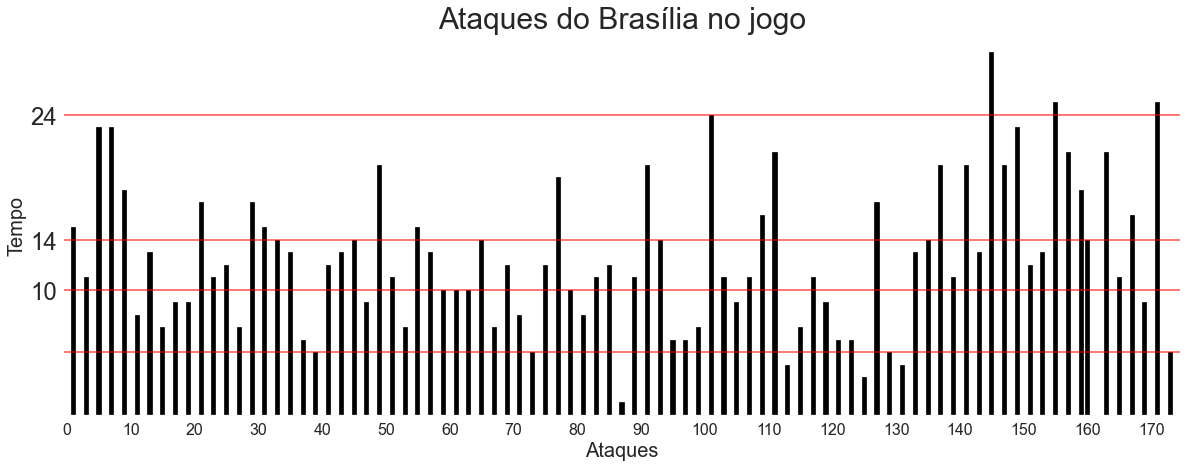

In [47]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time1, color='black')
plt.title(f'Ataques do {nome_time_casa} no jogo', fontsize=30)
plt.yticks([10,14,24], fontsize=24)
plt.ylabel('Tempo', fontsize=20)
plt.xlabel('Ataques', fontsize=20)
plt.xticks(x[::frequency], my_xticks[::frequency], fontsize=16)
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
plt.axhline(5, color='red', alpha=0.6, label = '5 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste3.png', format='png')

# Código

In [48]:
lu_time_b = posse_de_bola
lu_time_b['Time_Novo'] = 0

In [49]:
for x in range(len(posse_de_bola)):
    if lu_time_b['Time'][x] == sigla_time_b:
        lu_time_b.loc[x,'Time_Novo'] = lu_time_b['Tempo'][x]
    else:
        pass

In [50]:
lu_time_b

,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,Time_Novo
0,0,RCB,28.0,2_Pts_T,0.0,0.0,0.0,28.0,28.0
1,1,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0,0.0
2,2,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0,7.0
3,3,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0,0.0
4,4,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0,18.0
...,...,...,...,...,...,...,...,...,...
170,170,RCB,7.0,LL_Pts_C,3.0,-3.0,3.0,2338.0,7.0
171,171,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0,0.0
172,172,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0,27.0
173,173,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0,0.0


In [51]:
grafico_posse_time2 = lu_time_b
grafico_posse_time2.reset_index(inplace=True)

In [52]:
grafico_posse_time2

,level_0,index,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,Time_Novo
0,0,0,RCB,28.0,2_Pts_T,0.0,0.0,0.0,28.0,28.0
1,1,1,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0,0.0
2,2,2,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0,7.0
3,3,3,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0,0.0
4,4,4,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0,18.0
...,...,...,...,...,...,...,...,...,...,...
170,170,170,RCB,7.0,LL_Pts_C,3.0,-3.0,3.0,2338.0,7.0
171,171,171,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0,0.0
172,172,172,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0,27.0
173,173,173,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0,0.0


In [53]:
x2 = grafico_posse_time2['index']
my_xticks2 = x2
frequency2 = 10

# Gráfico 2

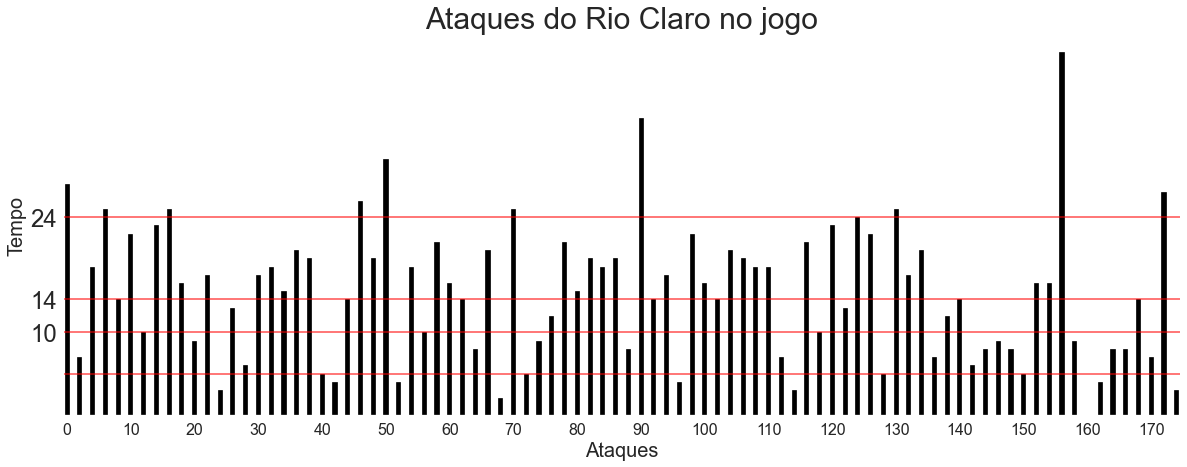

In [54]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Time_Novo', data=grafico_posse_time2, color='black')
plt.title(f'Ataques do {nome_time_fora} no jogo', fontsize=30)
plt.yticks([10,14,24], fontsize=24)
plt.ylabel('Tempo', fontsize=20)
plt.xlabel('Ataques', fontsize=20)
plt.xticks(x2[::frequency2], my_xticks2[::frequency2], fontsize=16)
plt.axhline(24, color='red', alpha=0.6, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.6, label = '14 segundos')
plt.axhline(10, color='red', alpha=0.6, label = '10 segundos')
plt.axhline(5, color='red', alpha=0.6, label = '5 segundos')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste4.png', format='png')

# Análises descritiva da posse de bola
### Contagem dos indicadores técnicos no final de cada ataque realizado  
* Pts_3_C    -> Três Pontos Convertidos 
* Pts_3_E    -> Três Pontos Errados
* Pts_2_C    -> Dois Pontos Convertidos
* Pts_2_E    -> Dois Pontos Errados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* Tempo_de_posse -> tempo de posse de cada ataque realizado
* Ataques/min 
* posse      -> total de ataques do time   

## Código

In [55]:
soma_a = df_time_a['Indicador'].value_counts().sum()
soma_b = df_time_b['Indicador'].value_counts().sum()

In [56]:
contagem = pd.DataFrame()
contagem = contagem.append(df_time_a['Indicador'].value_counts(), ignore_index=True)
contagem = contagem.append(df_time_b['Indicador'].value_counts(), ignore_index=True)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T
0,14.0,16.0,7.0,8.0,31.0,7.0,4.0
1,16.0,19.0,4.0,22.0,17.0,7.0,3.0


In [57]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna = []
for i in contagem:
    valores_coluna.append(i)
    
if 'EN' not in valores_coluna:
    contagem['EN'] = [0.0, 0.0]
if 'LL_Pts_T' not in valores_coluna:
    contagem['LL_Pts_T'] = [0.0, 0.0]
if 'LL_Pts_C' not in valores_coluna:
    contagem['LL_Pts_C'] = [0.0, 0.0]
# substituir os valores NAN por 0(zero)
contagem.fillna(0, inplace=True)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T,EN
0,14.0,16.0,7.0,8.0,31.0,7.0,4.0,0.0
1,16.0,19.0,4.0,22.0,17.0,7.0,3.0,0.0


In [58]:
contagem.loc[0, '2_Pts_C'] = contagem['2_Pts_C'][0] + contagem['EN'][0]
contagem.loc[1, '2_Pts_C'] = contagem['2_Pts_C'][1] + contagem['EN'][1]

In [59]:
contagem.drop('EN', inplace=True, axis=1)
contagem

,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,ER,LL_Pts_C,LL_Pts_T
0,14.0,16.0,7.0,8.0,31.0,7.0,4.0
1,16.0,19.0,4.0,22.0,17.0,7.0,3.0


In [60]:
contagem.rename(columns={"2_Pts_T": "2_Pts_E", "3_Pts_T": "3_Pts_E", "LL_Pts_T": "LL_Pts_E"}, inplace=True)

In [61]:
contagem['2_Pts_T'] = contagem['2_Pts_C'] + contagem['2_Pts_E']
contagem['3_Pts_T'] = contagem['3_Pts_C'] + contagem['3_Pts_E']
contagem['LL_Pts_T'] = contagem['LL_Pts_C'] + contagem['LL_Pts_E']

In [62]:
contagem['Time'] = [sigla_time_a, sigla_time_b]
contagem['posse'] = [soma_a, soma_b]
contagem['%2_Pts_C'] = [round((contagem['2_Pts_C'][0]/soma_a)*100), round((contagem['2_Pts_C'][1]/soma_b)*100)]
contagem['%2_Pts_E'] = [round((contagem['2_Pts_E'][0]/soma_a)*100), round((contagem['2_Pts_E'][1]/soma_b)*100)]
contagem['%3_Pts_C'] = [round((contagem['3_Pts_C'][0]/soma_a)*100), round((contagem['3_Pts_C'][1]/soma_b)*100)]
contagem['%3_Pts_E'] = [round((contagem['3_Pts_E'][0]/soma_a)*100), round((contagem['3_Pts_E'][1]/soma_b)*100)]
contagem['%LL_Pts_C'] = [round((contagem['LL_Pts_C'][0]/soma_a)*100), round((contagem['LL_Pts_C'][1]/soma_b)*100)]
contagem['%LL_Pts_E'] = [round((contagem['LL_Pts_E'][0]/soma_a)*100), round((contagem['LL_Pts_E'][1]/soma_b)*100)]
contagem['Tempo_de_posse'] = [(round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_a].Tempo.sum()/60)),
                              (round(posse_de_bola.loc[posse_de_bola['Time'] == sigla_time_b].Tempo.sum()/60))]
contagem['Ataques/min'] = [(round(contagem['posse'][0]/contagem['Tempo_de_posse'][0], 2)),
                           (round(contagem['posse'][1]/contagem['Tempo_de_posse'][1], 2))]

In [63]:
contagem['posse'][0]/contagem['Tempo_de_posse'][0]

4.833333333333333

In [64]:
contagem = contagem[['Time', 'posse', 'Tempo_de_posse', 'Ataques/min',
                     '2_Pts_C', '2_Pts_E', '2_Pts_T',
                     '3_Pts_C', '3_Pts_E', '3_Pts_T',
                     'LL_Pts_C', 'LL_Pts_E', 'LL_Pts_T',
                     '%2_Pts_C', '%2_Pts_E', '%3_Pts_C',
                     '%3_Pts_E', '%LL_Pts_C', '%LL_Pts_E']]
contagem

,Time,posse,Tempo_de_posse,Ataques/min,2_Pts_C,2_Pts_E,2_Pts_T,3_Pts_C,3_Pts_E,3_Pts_T,LL_Pts_C,LL_Pts_E,LL_Pts_T,%2_Pts_C,%2_Pts_E,%3_Pts_C,%3_Pts_E,%LL_Pts_C,%LL_Pts_E
0,BRA,87,18.0,4.83,14.0,16.0,30.0,7.0,8.0,15.0,7.0,4.0,11.0,16.0,18.0,8.0,9.0,8.0,5.0
1,RCB,88,22.0,4.00,16.0,19.0,35.0,4.0,22.0,26.0,7.0,3.0,10.0,18.0,22.0,5.0,25.0,8.0,3.0


In [65]:
posse_de_bola_b = posse_de_bola[posse_de_bola['Time'] == sigla_time_b]
v1 = len(posse_de_bola_b[posse_de_bola_b['Tempo'] <= 5])
v2 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 5) & (posse_de_bola_b['Tempo'] <= 10)])
v3 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 10) & (posse_de_bola_b['Tempo'] <= 14)])
v4 = len(posse_de_bola_b[(posse_de_bola_b['Tempo'] > 14) & (posse_de_bola_b['Tempo'] <= 24)])
v5 = len(posse_de_bola_b[posse_de_bola_b['Tempo'] > 24])
valores_b = {f'{sigla_time_b}':(v1, v2, v3, v4, v5)}
valores_b

{'RCB': (13, 19, 11, 35, 10)}

In [66]:
posse_de_bola_a = posse_de_bola[posse_de_bola['Time'] == sigla_time_a]
v1 = len(posse_de_bola_a[posse_de_bola_a['Tempo'] <= 5])
v2 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 5) & (posse_de_bola_a['Tempo'] <= 10)])
v3 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 10) & (posse_de_bola_a['Tempo'] <= 14)])
v4 = len(posse_de_bola_a[(posse_de_bola_a['Tempo'] > 14) & (posse_de_bola_a['Tempo'] <= 24)])
v5 = len(posse_de_bola_a[posse_de_bola_a['Tempo'] > 24])
valores_a = {f'{sigla_time_a}':(v1, v2, v3, v4, v5)}
valores_a

{'BRA': (8, 24, 29, 23, 3)}

In [67]:
# tempo de ataque separado por cada ataque 
# juntar valores de A e valores de B
valores_a.update(valores_b)
tempos = ('<=5', '>5<=10', '>10<=14', '>14<=24', '>24')
ataques = pd.DataFrame(data=valores_a, index=tempos)

In [68]:
# Contra-Ataque
# Ataque Rápido 
# Ataque Moderado
# Ataque Controlado
# Ataque Prolongado
ataques

,BRA,RCB
<=5,8,13
>5<=10,24,19
>10<=14,29,11
>14<=24,23,35
>24,3,10


#  Gráfico da diferença da placar

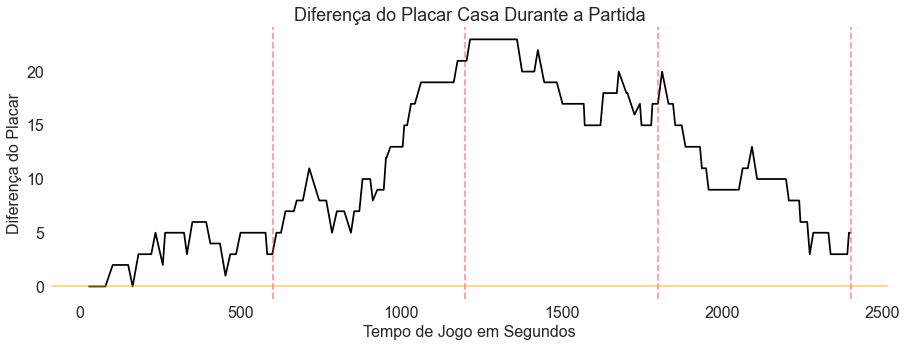

In [69]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(posse_bola['Tempo_Fim'], posse_bola['dif_casa'], color='black')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 16)
plt.xticks(fontsize= 16)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=posse_bola.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=posse_bola.index, alpha=0.5)

# Analisar os períodos positivos dos times

In [70]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
posse_bola["pontuacao"] = posse_bola["dif_casa"].diff()
posse_bola["pontuacao"] = posse_bola["pontuacao"].apply(lambda x: abs(x))

In [71]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = posse_bola["dif_casa"][0]
posse_bola.loc[0, 'pontuacao'] = abs(novo_valor)

In [72]:
# questão de precaução 
posse_bola.reset_index(inplace=True, drop=True)

# Dois Tipos de Posse
## Primeira

In [73]:
# dois tipos de posse de bola 
# 1 o time que teve a primeira posse de bola
posse_bola_um = posse_bola.copy()

In [74]:
# avaliar quem é o primeiro a ter a posse de bola para poder se encaixar com a função das posses
segunda_posse = posse_bola.Time[1]
segunda_posse

'BRA'

In [75]:
# Perguntar para o thomaz pq está errado
for i in range(len(posse_bola_um)):
    if posse_bola_um.Time[i] == segunda_posse:
        posse_bola_um.loc[i, 'pontuacao'] = posse_bola_um.pontuacao[i] * -1
    else:
        pass

In [76]:
# posse_bola.to_csv('tempo2.csv')
posse_bola_um

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,RCB,28.0,2_Pts_T,0.0,0.0,0.0,28.0,0.0
1,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0,-0.0
2,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0,0.0
3,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0,-0.0
4,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0,0.0
...,...,...,...,...,...,...,...,...
170,RCB,7.0,LL_Pts_C,3.0,-3.0,3.0,2338.0,2.0
171,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0,-0.0
172,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0,0.0
173,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0,-2.0


In [77]:
len(posse_bola_um)

175

In [78]:
def par_impar(posse_bola):
    # precisamos fazer dois estilos de DataFrame 
    # par = não influência no time que teve a primeira posse de bola
    # par = influência no time que teve a segunda posse de bola
    # inpar = não influência no time que teve a segunda posse de bola
    # inpar = influência no time que teve a primeira posse de bola
    if len(posse_bola) % 2 == 0:
        print(f"Par: {len(posse_bola)}")
        return posse_bola
    else:
        print(f"Impar: {len(posse_bola)}")
        d = {"Time": [0], "Tempo": [0], "Indicador": [0], "dif_casa": [0], "dif_visita": [0], "dif_abs": [0],
             "Tempo_Fim": [0], "pontuacao": [0]}
        a = pd.DataFrame(data=d)
        a.pontuacao = a.pontuacao.astype('float64')
        posse_bola = pd.concat([posse_bola, a], ignore_index=True)
    return posse_bola

In [79]:
posse_bola_um = par_impar(posse_bola_um)
posse_bola_um

Impar: 175


,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,RCB,28.0,2_Pts_T,0.0,0.0,0.0,28.0,0.0
1,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0,-0.0
2,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0,0.0
3,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0,-0.0
4,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0,0.0
...,...,...,...,...,...,...,...,...
171,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0,-0.0
172,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0,0.0
173,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0,-2.0
174,RCB,3.0,2_Pts_T,5.0,-5.0,5.0,2398.0,0.0


In [80]:
# Verificação das posses de bola pulando dois em dois
def periodo_potencial(posse_bola):
    indx_potencial_periodo = []
    for i in range(0, len(posse_bola), 2):
        # ache onde teve vantagem na pontuação
        # Time A fez ponto, mas o time B não fez
        if (posse_bola.pontuacao[i] >= 2) & (posse_bola.pontuacao[i+1] >= -1):
            indx_potencial_periodo.append(i)
        # ache onde teve pontuação dos dois times
        # Time A fez ponto e o time B fez ponto
        # Elimina a primeira posse de bola com essa condição
        elif i > 2:
            if (posse_bola.pontuacao[i] >= 2) & (posse_bola.pontuacao[i+1] <= -1):
                # Caso encontre uma troca de pontuação, nós precisamos avaliar outro critério
                # Caso apareça no ataque anterior uma vantagem na pontuação. PEGUE!
                # Come essa função está avaliando o primeiro time que atacou,
                # o time ao realizar um ponto estará na frente do placar anterior
                if (posse_bola.pontuacao[i-2] >= 2) & (posse_bola.pontuacao[i-1] >= -1):
                    indx_potencial_periodo.append(i)
                else:
                    pass
        else:
            pass
    # para ajudar no passo de verificação na separação dos períodos positivos eu criei um break 
    # o break consiste em acrescentando o valor zero (0) no final da lista
    indx_potencial_periodo.append(0)
    return indx_potencial_periodo

In [81]:
indx_potencial_periodo = periodo_potencial(posse_bola_um)

primeira coisa que precisamos analisar é 
- Identificar sequencia da pontuação. Precisa no minimo uma dupla de ataques (2, 2)
- Se essa sequencia apresenta uma pontuação de mais de 4 pontos

In [82]:
def identificardor_periodo_positivo(indx_potencial_periodo, posse_bola):
    # Primeiro passo é fazer a diferença entre cada periodo identificado
    dif = np.diff(indx_potencial_periodo)
    resultado = []
    periodo = []
    # Depois precisamos encontra quais apresentão ataques consecutivos (2)
    # localizados os ataques, vamos agrupar os indxs e geramos periodos
    for i, j in zip(dif, range(len(dif))):
        if i == 2:
            resultado.append(indx_potencial_periodo[j])
            resultado.append(indx_potencial_periodo[j+1])
        else:
            periodo.append(sorted(set(resultado)))
            resultado = []
    periodo_positivo = []
    # depois de agrupa-los, nós identificamos quem apresenta valores nos períodos 
    for i in periodo:
        if any(i):
            # para que sejam considerados periodos positivos utilizamos uma pontuação maior que 4 pontos no período 
            if sum(posse_bola.loc[i, 'pontuacao']) >= 4:
                periodo_positivo.append(i)
            else:
                pass
        else:
            pass
    # retorna os períodos positivos do time
    return periodo_positivo

In [83]:
periodo_positivo = identificardor_periodo_positivo(indx_potencial_periodo, posse_bola_um)
periodo_positivo

[[124, 126, 128], [134, 136, 138], [142, 144], [162, 164]]

In [84]:
segunda_posse

'BRA'

In [85]:
sigla_time_a

'BRA'

In [86]:
# Colocar nos gráficos os periodos
# time A
segmento = [[]]
# Time B
segmento_dois = [[]]

In [87]:
# localizar o tempo de inicio e tempo final do periodo
# No caso precisamos pegar o primeiro indx e subtrair por 1 (indx-1), assim podemos ter a posse completa
# até a realização do ponto 
# Localizar o último indx que representa o final do período positivo
if segunda_posse == sigla_time_a:
    positivo_inicio_time_b = []
    positivo_fim_time_b = []
    for i in periodo_positivo:
        if i[0] == 0:
            positivo_inicio_time_b.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_b.append(posse_bola_um.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_um.loc[i[0]-1, 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time B')
    print(positivo_inicio_time_b)
    print(positivo_fim_time_b)
else:
    positivo_inicio_time_a = []
    positivo_fim_time_a =  []
    for i in periodo_positivo:
        if i[0] == 0:
            positivo_inicio_time_a.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_a.append(posse_bola_um.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_um.loc[i[0]-1, 'Tempo_Fim'],posse_bola_um.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time A')
    print(positivo_inicio_time_a)
    print(positivo_fim_time_a)

Time B
[1678.0, 1813.0, 1931.0, 2240.0]
[1749.0, 1886.0, 1958.0, 2273.0]


### Segundo Time

In [88]:
# 2 o time que teve a segunda posse de bola
posse_bola_dois = posse_bola.copy()
posse_bola_dois.drop([0], inplace=True)
posse_bola_dois.reset_index(drop=True, inplace=True)

In [89]:
# avaliar quem é o primeiro a ter a posse de bola para poder se encaixar com a função das posses
segunda_posse_dois = posse_bola_dois.Time[1]
segunda_posse_dois

'RCB'

In [90]:
# Perguntar para o thomaz pq está errado
for i in range(len(posse_bola_dois)):
    if posse_bola_dois.Time[i] == segunda_posse_dois:
        posse_bola_dois.loc[i, 'pontuacao'] = posse_bola_dois.pontuacao[i] * -1
    else:
        pass

In [91]:
posse_bola

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,RCB,28.0,2_Pts_T,0.0,0.0,0.0,28.0,0.0
1,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0,0.0
2,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0,0.0
3,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0,0.0
4,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0,0.0
...,...,...,...,...,...,...,...,...
170,RCB,7.0,LL_Pts_C,3.0,-3.0,3.0,2338.0,2.0
171,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0,0.0
172,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0,0.0
173,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0,2.0


In [92]:
posse_bola_dois

,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0,0.0
1,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0,-0.0
2,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0,0.0
3,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0,-0.0
4,BRA,23.0,2_Pts_C,2.0,-2.0,2.0,102.0,2.0
...,...,...,...,...,...,...,...,...
169,RCB,7.0,LL_Pts_C,3.0,-3.0,3.0,2338.0,-2.0
170,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0,0.0
171,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0,-0.0
172,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0,2.0


In [93]:
posse_bola_dois = par_impar(posse_bola_dois)
posse_bola_dois

Par: 174


,Time,Tempo,Indicador,dif_casa,dif_visita,dif_abs,Tempo_Fim,pontuacao
0,BRA,15.0,3_Pts_T,0.0,0.0,0.0,43.0,0.0
1,RCB,7.0,2_Pts_T,0.0,0.0,0.0,50.0,-0.0
2,BRA,11.0,2_Pts_T,0.0,0.0,0.0,61.0,0.0
3,RCB,18.0,3_Pts_T,0.0,0.0,0.0,79.0,-0.0
4,BRA,23.0,2_Pts_C,2.0,-2.0,2.0,102.0,2.0
...,...,...,...,...,...,...,...,...
169,RCB,7.0,LL_Pts_C,3.0,-3.0,3.0,2338.0,-2.0
170,BRA,25.0,3_Pts_T,3.0,-3.0,3.0,2363.0,0.0
171,RCB,27.0,LL_Pts_T,3.0,-3.0,3.0,2390.0,-0.0
172,BRA,5.0,LL_Pts_C,5.0,-5.0,5.0,2395.0,2.0


In [94]:
indx_potencial_periodo_dois = periodo_potencial(posse_bola_dois)

In [95]:
periodo_positivo_dois = identificardor_periodo_positivo(indx_potencial_periodo_dois, posse_bola_dois)
periodo_positivo_dois

[[30, 32], [42, 44], [58, 60], [72, 74, 76], [130, 132], [150, 152]]

In [96]:
# localizar o tempo de inicio e tempo final do periodo
# No caso precisamos pegar o primeiro indx e subtrair por 1 (indx-1), assim podemos ter a posse completa
# até a realização do ponto 
# Localizar o último indx que representa o final do período positivo
if segunda_posse_dois == sigla_time_a:
    positivo_inicio_time_b = []
    positivo_fim_time_b = []
    for i in periodo_positivo_dois:
        if i[0] == 0:
            positivo_inicio_time_b.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_b.append(posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_b.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento_dois.append([posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time B')
    print(positivo_inicio_time_b)
    print(positivo_fim_time_b)
else:
    positivo_inicio_time_a = []
    positivo_fim_time_a =  []
    for i in periodo_positivo_dois:
        if i[0] == 0:
            positivo_inicio_time_a.append(posse_bola_um.loc[i[0], 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_um.loc[i[0], 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
        else:
            positivo_inicio_time_a.append(posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'])
            positivo_fim_time_a.append(posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim'])
            segmento.append([posse_bola_dois.loc[i[0]-1, 'Tempo_Fim'],posse_bola_dois.loc[i[len(i)-1], 'Tempo_Fim']])
    print('Time A')
    print(positivo_inicio_time_a)
    print(positivo_fim_time_a)

Time A
[453.0, 599.0, 844.0, 1005.0, 1779.0, 2052.0]
[500.0, 640.0, 880.0, 1062.0, 1813.0, 2093.0]


# Gráfico dos períodos positivos

### períodos do times A e B

In [97]:
# Contra-Ataque
# Ataque Rápido 
# Ataque Moderado
# Ataque Controlado
# Ataque Prolongado
# quantos ataques foras feitos 

In [98]:
# Time A
del segmento[0]
segmento

[[453.0, 500.0],
 [599.0, 640.0],
 [844.0, 880.0],
 [1005.0, 1062.0],
 [1779.0, 1813.0],
 [2052.0, 2093.0]]

In [99]:
# isso precisa estar junto com o código á cima pois está relacionado com o tipo de posse de bola que foi utilizado e definir
# qual o time
def definir_conjuntos(segmento, posse_bola_dois):
    conjunto_durante = []
    conjunto_inicio = []
    conjunto_fim = []
    for i in range(len(segmento)):
        try:
            encontrar = posse_bola_dois.loc[(posse_bola_dois['Tempo_Fim']>=segmento[i][0]) &
                                            (posse_bola_dois['Tempo_Fim']<=segmento[i][1])]
            valor_durante = [encontrar.loc[encontrar.index[0]+1]['Tempo_Fim'], encontrar.values[-1][6]]
            conjunto_durante.append(valor_durante)
            # juntar informação de início do período
            valor_inicio = [posse_bola_dois.loc[encontrar.index[0]]['Tempo_Fim'],
                            encontrar.loc[encontrar.index[0]+1]['Tempo_Fim']]
            conjunto_inicio.append(valor_inicio)
            # juntar informações no fim do período
            valor_fim = [posse_bola_dois.loc[encontrar.index[-1]+1]['Tempo_Fim'],
                         posse_bola_dois.loc[encontrar.index[-1]+2]['Tempo_Fim']]
            conjunto_fim.append(valor_fim)
        except:
            encontrar = posse_bola_dois.loc[(posse_bola_dois['Tempo_Fim']>=segmento[i][0]) &
                                            (posse_bola_dois['Tempo_Fim']<=segmento[i][1])]
            valor_durante = [encontrar.loc[encontrar.index[0]+1]['Tempo_Fim'], encontrar.values[-1][6]]
            conjunto_durante.append(valor_durante)
            # juntar informação de início do período
            valor_inicio = [posse_bola_dois.loc[encontrar.index[0]]['Tempo_Fim'],
                            encontrar.loc[encontrar.index[0]+1]['Tempo_Fim']]
            conjunto_inicio.append(valor_inicio)

            # juntar informações no fim do período
            conjunto_fim.append([0,0])
    return conjunto_durante, conjunto_inicio, conjunto_fim

In [100]:
conjunto_durante, conjunto_inicio, conjunto_fim = definir_conjuntos(segmento, posse_bola_dois)

In [101]:
conjunto_durante

[[468.0, 500.0],
 [612.0, 640.0],
 [854.0, 880.0],
 [1010.0, 1062.0],
 [1783.0, 1813.0],
 [2064.0, 2093.0]]

In [102]:
conjunto_inicio

[[453.0, 468.0],
 [599.0, 612.0],
 [844.0, 854.0],
 [1005.0, 1010.0],
 [1779.0, 1783.0],
 [2052.0, 2064.0]]

In [103]:
conjunto_fim

[[515.0, 528.0],
 [666.0, 675.0],
 [894.0, 904.0],
 [1083.0, 1093.0],
 [1833.0, 1847.0],
 [2109.0, 2134.0]]

In [104]:
relatorio = df.copy()
# estamos invertendo os valores para deixar parecido com o jogo
relatorio = relatorio[::-1]
relatorio.reset_index(drop=True, inplace=True)
# drop valores em que não aparecem o nome do time

## Primeira parte 

In [179]:
def contagem_periodo_inicio(relatorio, conjunto_inicio):
    a = []
    a1 = []
    a2 = []
    a3 = []
    for i in range(len(conjunto_inicio)):
        # localizar no dataframe os períodos
        encontrar_dado = relatorio.loc[(relatorio['Tempo']>=conjunto_inicio[i][0]) &
                                       (relatorio['Tempo']<=conjunto_inicio[i][1])]
        # Separar o time da casa e o time de fora
        encontrar_inicio_casa = encontrar_dado[encontrar_dado['Time'] == sigla_time_a]['Indicador']
        encontrar_inicio_adv = encontrar_dado[encontrar_dado['Time'] == sigla_time_b]['Indicador']
        for x in encontrar_inicio_casa:
            if x == 'BR':
                a.append(x)
        for x in encontrar_inicio_adv:
            if (x == '2_Pts_T') | (x == '3_Pts_T') | (x == 'LL_Pts_T'):
                a1.append(x)    
            if (x == 'ER'):
                a2.append(x)    
            if (x == '2_Pts_C') | (x == '3_Pts_C') | (x == 'LL_Pts_C'):
                a3.append(x)
    contagem_inicio = [f'Cesta do adversário: {len(a3)}',
                       f'Tentativas do adversário: {len(a1)}',
                       f'Roubos de Bola: {len(a)}',
                       f'Erros do adversário: {len(a2)}']
    return contagem_inicio

In [181]:
contagem_inicio = contagem_periodo_inicio(relatorio, conjunto_inicio)
contagem_inicio

['Cesta do adversário: 2',
 'Tentativas do adversário: 2',
 'Roubos de Bola: 1',
 'Erros do adversário: 2']

## Segunda parte 

In [108]:
d = {'col1': ['Erros seguidos: ',
              'T. de Três Seguidos: ',
              'T. de Dois Seguidos: ',
              'T. de Lances Livres Seguidos: ',
              'T. de Três e Dois: ',
              'T. de Três e Lances Livres: ',
              'T. de Dois e Lances Livres: ',
              'T. de Arremesso e Erros: '
             ],
    'col2':[(False, False, False, True),
            (True, False, False, False),
            (False, True, False, False),
            (False, False, True, False),
            (True, True, False, False),
            (True, False, True, False),
            (False, True, True, False),
            (True, True, True, True)
             ],
    'col3': [0, 0, 0, 0, 0, 0, 0, 0]}
comparação_adv = pd.DataFrame(data=d)

d = {'col1': ['Três Pontos seguidos: ',
              'Dois Pontos seguidos: ',
              'Lances Livres seguidos: ',
              'Três e Dois pontos: ',
              'Três e Lances livres: ',
              'Dois e Lances livres: ',
              'Todos: '
             ],
    'col2':[(True, False, False),
              (False, True, False),
              (False, False, True),
              (True, True, False),
              (True, False, True),
              (False, True, True),
              (True, True, True)
             ],
    'col3': [0, 0, 0, 0, 0, 0, 0]}
comparação_time = pd.DataFrame(data=d)

In [105]:
def periodo_durante_time(encontrar, dado):
    # Encontrando os valores da contagem através do index 
    # dessa forma podemos encontrar se a alção foi consecutiva ou não
    resul = tuple(encontrar.index)
    a = []
    # fazer filtro apenas para os valores de pontuação 
    for x in resul:
        if (x == '2_Pts_C') | (x == '3_Pts_C') | (x == 'LL_Pts_C'):
            a.append(x)
    # Deixar uma ordem para localizar os valores, caso não esteja presete o valor é colocado como zero
    final = []
    for i in ('3_Pts_C', '2_Pts_C', 'LL_Pts_C'):
        if i not in a:
            final.append(0)
        else:
            final.append(i)
    # realização de um generator para definir a classe
    for rows in dado.itertuples():
        if tuple((_ != 0 for _ in final)) == rows.col2:
            dado.loc[rows.Index, ['col3']] +=1

In [106]:
def periodo_durante_adv(encontrar, dado):
    # Encontrando os valores da contagem através do index 
    # dessa forma podemos encontrar se a alção foi consecutiva ou não
    resul = tuple(encontrar.index)
    a = []
    # fazer filtro apenas para os valores de pontuação 
    for x in resul:
        if (x == '2_Pts_T') | (x == '3_Pts_T') | (x == 'LL_Pts_T') | (x == 'ER'):
            a.append(x)
    # Deixar uma ordem para localizar os valores, caso não esteja presete o valor é colocado como zero
    final = []
    for i in ('3_Pts_T', '2_Pts_T', 'LL_Pts_T', 'ER'):
        if i not in a:
            final.append(0)
        else:
            final.append(i)
    # realização de um generator para definir a classe
    if (tuple((_ != 0 for _ in final)) == (True, False, False, True)) | \
        (tuple((_ != 0 for _ in final)) == (False, True, False, True)) | \
        (tuple((_ != 0 for _ in final)) == (False, False, True, True)) | \
        (tuple((_ != 0 for _ in final)) == (True, False, True, True)) | \
        (tuple((_ != 0 for _ in final)) == (False, True, True, True))| \
        (tuple((_ != 0 for _ in final)) == (True, True, False, True)):
        dado.loc[7, ['col3']] +=1
    for rows in dado.itertuples():
        if tuple((_ != 0 for _ in final)) == rows.col2:
            dado.loc[rows.Index, ['col3']] +=1

In [169]:
resultado_durante = []
resultado_tecnico = []
dicty = {}
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
for i in range(len(conjunto_durante)):
    # localizar no dataframe os períodos
    encontrar_dado = relatorio.loc[(relatorio['Tempo']>=conjunto_durante[i][0]) & (relatorio['Tempo']<=conjunto_durante[i][1])]
    # Separar o time da casa e o time de fora
    encontrar_resultado_casa = encontrar_dado[encontrar_dado['Time'] == sigla_time_a]['Indicador']
    encontrar_resultado_adv = encontrar_dado[encontrar_dado['Time'] == sigla_time_b]['Indicador']
    # Acrescentar os valores nos dataframes 
    periodo_durante_time(encontrar=encontrar_resultado_casa.value_counts(), dado=comparação_time)
    periodo_durante_adv(encontrar=encontrar_resultado_adv.value_counts(), dado=comparação_adv)
    # Acrescentar informações dos treinadores durante o período
    acoes_durante = acao_treinador_jogo(resultado_durante, encontrar_resultado_adv, resultado_tecnico)
    # somatória final
    for x in encontrar_resultado_casa:
        if x == '3_Pts_C':
            a1.append(x*3)    
        if x == '2_Pts_C':
            a2.append(x*2)    
        if x == 'LL_Pts_C':
            a3.append(x)
    for x in encontrar_resultado_adv:
        if x == 'ER':
            a4.append(x)
        if x == '3_Pts_T':
            a5.append(x*3)    
        if x == '2_Pts_T':
            a6.append(x*2)    
        if x == 'LL_Pts_T':
            a7.append(x)
contagem_casa_durante = [f'Três Pontos: {len(a1)}',
                         f'Dois Pontos: {len(a2)}',
                         f'Lances Livres: {len(a3)}'
                        ]
contagem_adv_durante = [f'Erros: {len(a4)}',
                        f'Três Pontos T.: {len(a5)}',
                        f'Dois Pontos T.: {len(a6)}',
                        f'Lances Livres T.: {len(a7)}'
                       ]

In [170]:
contagem_casa_durante

['Três Pontos: 2', 'Dois Pontos: 9', 'Lances Livres: 4']

In [111]:
valores_time1_p = []
for i in range(len(comparação_time)):
    valores_time1_p.append(comparação_time.col1[i] + f'{comparação_time.col3[i]}')
valores_time1_p

['Três Pontos seguidos: 0',
 'Dois Pontos seguidos: 3',
 'Lances Livres seguidos: 0',
 'Três e Dois pontos: 1',
 'Três e Lances livres: 1',
 'Dois e Lances livres: 1',
 'Todos: 0']

## Terceira Parte

In [171]:
contagem_adv_durante

['Erros: 3', 'Três Pontos T.: 1', 'Dois Pontos T.: 3', 'Lances Livres T.: 0']

In [112]:
acoes_adv = []
for i in range(len(comparação_adv)):
    acoes_adv.append(comparação_adv.col1[i] + f'{comparação_adv.col3[i]}')
acoes_adv

['Erros seguidos: 2',
 'T. de Três Seguidos: 1',
 'T. de Dois Seguidos: 3',
 'T. de Lances Livres Seguidos: 0',
 'T. de Três e Dois: 0',
 'T. de Três e Lances Livres: 0',
 'T. de Dois e Lances Livres: 0',
 'T. de Arremesso e Erros: 0']

## Quarta parte

In [109]:
def acao_treinador_jogo(resu, encontrar, resu1):
    re = tuple(encontrar.value_counts().index)
    # fazer filtro apenas para os valores de pontuação 
    for i in re:
        if i == 'substituicao_sai':
            resu1.append(i)
        s3 = resu1.count('substituicao_sai')
    ######################################################
    for x in encontrar:
        if (x == 'substituicao_sai') | (x == 'tempo_tecnico'):
            resu.append(x)
    s = resu.count('substituicao_sai')
    s1 = resu.count('tempo_tecnico')
    acoes_fim = [f'Número de Substituições: {s}',
                 f'Tempos técnicos: {s1}',
                f'Substituições por período: {s3}']
    if sum([s,s1]) == 0:
        acoes_fim.insert(0, False)
    else:
        acoes_fim.insert(0, True)
    return acoes_fim

In [113]:
resultado_fim = []
resultado_tecnico_fim = []
for i in range(len(conjunto_fim)):
    # localizar no dataframe os períodos
    tecnico = relatorio.loc[(relatorio['Tempo']>=conjunto_fim[i][0]) & (relatorio['Tempo']<=conjunto_fim[i][1])]
    encontrar_tecnico = tecnico[tecnico['Time'] == sigla_time_b]['Indicador']
    # fazer filtro apenas para os valores de pontuação 
    acoes_fim = acao_treinador_jogo(resultado_fim, encontrar_tecnico, resultado_tecnico_fim)

In [114]:
acoes_tecnicas = acoes_durante + acoes_fim
acoes_tecnicas

[True,
 'Número de Substituições: 4',
 'Tempos técnicos: 0',
 'Substituições por período: 4',
 True,
 'Número de Substituições: 3',
 'Tempos técnicos: 1',
 'Substituições por período: 2']

In [115]:
aaaaaaaaaaaaaaa

NameError: name 'aaaaaaaaaaaaaaa' is not defined

In [ ]:
conjunto = pd.DataFrame()
for i in range(len(segmento)):
    encontrar = relatorio.loc[(relatorio['Tempo']>=segmento[i][0]) & (relatorio['Tempo']<=segmento[i][1])]
    index = encontrar.index[-1]
    print(encontrar.index)
    valor = relatorio.loc[pd.Index([index+1, index+2])]
    encontrar = encontrar.append(valor)
    encontrar = encontrar[['Time', 'Tempo', 'Indicador']]
    conjunto = pd.concat([conjunto, encontrar])

In [ ]:
conjunto.to_csv('tempo2.csv')

In [ ]:
aaaaaaaaaaaa

In [ ]:
conjunto[].value_counts()

O Período foi iniciado após ......
Durante: 
O Fim do Período foi com ......

In [ ]:
'''
        for i in range(len(segmento)):
            encontrar = posse_bola_um.loc[(posse_bola_um['Tempo_Fim']>=segmento[i][0]) 
                                          & (posse_bola_um['Tempo_Fim']<=segmento[i][1])]
            index = encontrar.index[-1]
            valor = posse_bola_um.loc[pd.Index([index+1, index+2])]
            encontrar = encontrar.append(valor)
            encontrar = encontrar[['Time', 'Tempo', 'Indicador', 'dif_casa']]
            print(encontrar)
            # print(f'Antes de Começar o Período do time aconteceu: \n, {encontrar[0]}')'''

In [ ]:
def procurar_video(segmento_time, nome_time):
    apresentacao = []
    for i in segmento_time:
        ataque = []
        p = []
        for j in i:
            if j <= 600:
                valor = dt.timedelta(seconds=abs(600-j))
                valor = ':'.join(str(valor).split(':')[1:])
                ataque.append(valor)
                p.append(1)
            elif (j > 600) & (j <= 1200):
                valor = dt.timedelta(seconds=abs(1200-j))
                valor = ':'.join(str(valor).split(':')[1:])
                ataque.append(valor)
                p.append(2)
            elif (j > 1200) & (j <= 1800):
                valor = dt.timedelta(seconds=abs(1800-j))
                valor = ':'.join(str(valor).split(':')[1:])
                ataque.append(valor)
                p.append(3)
            elif (j > 1800) & (j <= 2400):
                valor = dt.timedelta(seconds=abs(2400-j))
                valor = ':'.join(str(valor).split(':')[1:])
                ataque.append(valor)
                p.append(4)
        soma = p[0] - p[1]
        if soma != 0:
            apresentacao.append(f'{p[0]}° Quarto -> Início {ataque[0]} até {ataque[1]} do {p[1]}° Quarto')
        else:
            apresentacao.append(f'{p[0]}° Quarto -> Início {ataque[0]} até {ataque[1]}')
    print(f'Foram {len(segmento_time)} Períodos Positivos do {nome_time}')
    for i in apresentacao:
        print(i)
    return apresentacao

In [ ]:
tempos_time1 = procurar_video(segmento, nome_time_casa)

In [ ]:
tempos_time1

In [ ]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(posse_bola['Tempo_Fim'], posse_bola['dif_casa'], color='black')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 16)
plt.xticks(fontsize= 16)
for i in segmento:
    selecao = (posse_bola['Tempo_Fim'] >= i[0]) & (posse_bola['Tempo_Fim'] <= i[1])
    df_filtado_dif = posse_bola[selecao]['dif_casa']
    df_filtado_t = posse_bola[selecao]['Tempo_Fim']
    plt.plot(df_filtado_t, df_filtado_dif, color='red')
for x in quartos:
    plt.axvline(x, color='red', label=posse_bola.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=posse_bola.index, alpha=0.5)
plt.savefig('RELATORIO/teste1.jpeg', format='jpg')

In [ ]:
AAAAAAAAAAAAAA

In [ ]:
# Precisa acrescentar as prorrogações
'''elif (j > 1800) & (j <= 2400):
            ataque.append(round(10-((j/60)-30),2))
            p = 5
        elif (j > 1800) & (j <= 2400):
            ataque.append(round(10-((j/60)-30),2))
            p = 6
        elif (j > 1800) & (j <= 2400):
            ataque.append(round(10-((j/60)-30),2))
            p = 7
            
        elif p == 2:
        tempos_time2['2° Quarto'].append(ataque)
    elif p == 2:
        tempos_time2['2° Quarto'].append(ataque)
    elif p == 2:
        tempos_time2['2° Quarto'].append(ataque)
'''

In [ ]:
# Time B
del segmento_dois[0]
segmento_dois

In [ ]:
# quantos ataques foras feitos 
posse_bola_um.loc[(posse_bola_um['Tempo_Fim']>=segmento[0][0])& (posse_bola_um['Tempo_Fim']<=segmento[0][1])]

In [ ]:
tempos_time2 = procurar_video(segmento_dois, nome_time_fora)

# Tabela de dados gerais

In [ ]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(posse_bola['Tempo_Fim'], posse_bola['dif_casa'], color='black')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.ylabel('Diferença do Placar', fontsize=16)
plt.xlabel('Tempo de Jogo em Segundos', fontsize=16)
plt.yticks(fontsize= 16)
plt.xticks(fontsize= 16)
for i in segmento_dois:
    selecao_dois = (posse_bola['Tempo_Fim'] >= i[0]) & (posse_bola['Tempo_Fim'] <= i[1])
    df_filtado_dif = posse_bola[selecao_dois]['dif_casa']
    df_filtado_t = posse_bola[selecao_dois]['Tempo_Fim']
    plt.plot(df_filtado_t, df_filtado_dif, label = 'diferença do placar', color='red')
for x in quartos:
    plt.axvline(x, color='red', label=posse_bola.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=posse_bola.index, alpha=0.5)
plt.savefig('RELATORIO/teste2.jpeg', format='jpg')

## Código

In [ ]:
Tabela_Geral = df[['Time','Indicador','Nome']]

In [ ]:
Tabela_Geral_Time1 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_a]
Tabela_Geral_Time2 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_b]

In [ ]:
tabela_time1 = Tabela_Geral_Time1.groupby(['Nome', 'Indicador']).count()
tabela_time2 = Tabela_Geral_Time2.groupby(['Nome', 'Indicador']).count()

In [ ]:
tabela_time1_pivot = tabela_time1.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T
tabela_time2_pivot = tabela_time2.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T

In [ ]:
valores_coluna_time1 = tabela_time1_pivot.columns.values

In [ ]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time1 = tabela_time1_pivot.columns.values
colunas = ['TO', 'FC_O', 'FC_T', 'FC_A', 'EN', 'LL_Pts_C', 'LL_Pts_T', 'BR']
tamanho_df_pivot = len(tabela_time1_pivot)
for j in colunas:
    if j not in valores_coluna_time1:
        tabela_time1_pivot[j] = [0 for _ in range(len(tabela_time1_pivot))]
    else:
        pass

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Time'] = nome_time_casa0

nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Oponente'] = nome_time_fora0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Data'] = dia_do_jogo0

casa0 = [casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Casa/Fora'] = casa0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Classificatoria/Playoffs'] = classificatoria0

In [ ]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time1 = []
for i in tabela_time1_pivot:
    valores_coluna_time1.append(i)

tamanho_df_pivot = len(tabela_time1_pivot)
if 'TO' not in valores_coluna_time1:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time1:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time1:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time1:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_A'] = fca
if 'EN' not in valores_coluna_time1:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['EN'] = en
if 'LL_Pts_C' not in valores_coluna_time1:
    llc = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['LL_Pts_C'] = llc
if 'LL_Pts_T' not in valores_coluna_time1:
    llt = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['LL_Pts_T'] = llt
if 'BR' not in valores_coluna_time1:
    br = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['LL_Pts_T'] = br

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Time'] = nome_time_casa0

nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Oponente'] = nome_time_fora0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Data'] = dia_do_jogo0

casa0 = [casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Casa/Fora'] = casa0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Classificatoria/Playoffs'] = classificatoria0

In [ ]:
tabela_time1_pivot.columns

In [ ]:
tabela_time1_pivot.reset_index(inplace=True)
tabela_time1_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time1_pivot.columns

In [ ]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time2 = []
for i in tabela_time2_pivot:
    valores_coluna_time2.append(i)

tamanho_df_pivot = len(tabela_time2_pivot)
if 'TO' not in valores_coluna_time2:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time2:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time2:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time2:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_A'] = fca
if 'EN'not in valores_coluna_time2:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['EN'] = en
if 'LL_Pts_C' not in valores_coluna_time2:
    llc = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['LL_Pts_C'] = llc
if 'LL_Pts_T' not in valores_coluna_time2:
    llt = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['LL_Pts_T'] = llt
if 'BR' not in valores_coluna_time2:
    br = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['LL_Pts_T'] = br
    
nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Time'] = nome_time_fora0

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Oponente'] = nome_time_casa0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Data'] = dia_do_jogo0

fora0 = [fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Casa/Fora'] = fora0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Classificatoria/Playoffs'] = classificatoria0  

In [ ]:
tabela_time2_pivot.reset_index(inplace=True)
tabela_time2_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time2_pivot.columns

## criar um novo data frame e agregar a soma

In [ ]:
Time1_Final = pd.DataFrame()

In [ ]:
Time1_Final['Time'] = tabela_time1_pivot['Time']
Time1_Final['Oponente'] = tabela_time1_pivot['Oponente']
Time1_Final['Data'] = tabela_time1_pivot['Data']
Time1_Final['Casa/Fora'] = tabela_time1_pivot['Casa/Fora']
Time1_Final['Classificatoria/Playoffs'] = tabela_time1_pivot['Classificatoria/Playoffs']
Time1_Final['Nome'] = tabela_time1_pivot['Nome']
Time1_Final['Pts_3_C'] = tabela_time1_pivot['3_Pts_C'] * 3
Time1_Final['Pts_3_T'] = (tabela_time1_pivot['3_Pts_T'] + tabela_time1_pivot['3_Pts_C']) * 3
Time1_Final['Pts_2_C'] = (tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['Pts_2_T'] = (tabela_time1_pivot['2_Pts_T'] + tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['LL_C'] = tabela_time1_pivot['LL_Pts_C']
Time1_Final['LL_T'] = tabela_time1_pivot['LL_Pts_T'] + tabela_time1_pivot['LL_Pts_C']
Time1_Final['RO'] = tabela_time1_pivot['RO']
Time1_Final['RD'] = tabela_time1_pivot['RD']
Time1_Final['RT'] = tabela_time1_pivot['RO'] + tabela_time1_pivot['RD']
Time1_Final['AS'] = tabela_time1_pivot['AS']
Time1_Final['BR'] = tabela_time1_pivot['BR']
Time1_Final['TO'] = tabela_time1_pivot['TO']
Time1_Final['FC'] = tabela_time1_pivot['FC'] + tabela_time1_pivot['FC_T']+tabela_time1_pivot['FC_O']+tabela_time1_pivot['FC_A']
Time1_Final['FR'] = tabela_time1_pivot['FR']
Time1_Final['ER'] = tabela_time1_pivot['ER']
Time1_Final['EN'] = tabela_time1_pivot['EN']
Time1_Final['substituicao_entra'] = tabela_time1_pivot['substituicao_entra']
Time1_Final['substituicao_sai'] = tabela_time1_pivot['substituicao_sai']

In [ ]:
Time1_Final['Ar_Pts_C'] = (Time1_Final['Pts_3_C']/3) + (Time1_Final['Pts_2_C']/2) - Time1_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time1_Final['Ar_Pts_T'] = (Time1_Final['Pts_3_T']/3) + (Time1_Final['Pts_2_T']/2) # NÃO contabiliza EN
Time1_Final['Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] + Time1_Final['LL_C']
Time1_Final['Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] + Time1_Final['LL_T']

In [ ]:
Time1_Final['posse_de_bola'] = round(Time1_Final['Ar_Pts_T'] - Time1_Final['RO'] + Time1_Final['ER'] + (0.4 * Time1_Final['LL_T']), 0)
Time1_Final

In [ ]:
Time2_Final = pd.DataFrame()

In [ ]:
Time2_Final['Time'] = tabela_time2_pivot['Time']
Time2_Final['Oponente'] = tabela_time2_pivot['Oponente']
Time2_Final['Data'] = tabela_time2_pivot['Data']
Time2_Final['Casa/Fora'] = tabela_time2_pivot['Casa/Fora']
Time2_Final['Classificatoria/Playoffs'] = tabela_time2_pivot['Classificatoria/Playoffs']
Time2_Final['Nome'] = tabela_time2_pivot['Nome']
Time2_Final['Pts_3_C'] = tabela_time2_pivot['3_Pts_C'] * 3
Time2_Final['Pts_3_T'] = (tabela_time2_pivot['3_Pts_T'] + tabela_time2_pivot['3_Pts_C']) * 3
Time2_Final['Pts_2_C'] = (tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['Pts_2_T'] = (tabela_time2_pivot['2_Pts_T'] + tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['LL_C'] = tabela_time2_pivot['LL_Pts_C']
Time2_Final['LL_T'] = tabela_time2_pivot['LL_Pts_T'] + tabela_time2_pivot['LL_Pts_C']
Time2_Final['RO'] = tabela_time2_pivot['RO']
Time2_Final['RD'] = tabela_time2_pivot['RD']
Time2_Final['RT'] = tabela_time2_pivot['RO'] + tabela_time2_pivot['RD']
Time2_Final['AS'] = tabela_time2_pivot['AS']
Time2_Final['BR'] = tabela_time2_pivot['BR']
Time2_Final['TO'] = tabela_time2_pivot['TO']
Time2_Final['FC'] = tabela_time2_pivot['FC'] + tabela_time2_pivot['FC_T']+tabela_time2_pivot['FC_O']+tabela_time2_pivot['FC_A']
Time2_Final['FR'] = tabela_time2_pivot['FR']
Time2_Final['ER'] = tabela_time2_pivot['ER']
Time2_Final['EN'] = tabela_time2_pivot['EN']
Time2_Final['substituicao_entra'] = tabela_time2_pivot['substituicao_entra']
Time2_Final['substituicao_sai'] = tabela_time2_pivot['substituicao_sai']

In [ ]:
Time2_Final['Ar_Pts_C'] = (Time2_Final['Pts_3_C']/3) + (Time2_Final['Pts_2_C']/2) - Time2_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time2_Final['Ar_Pts_T'] = (Time2_Final['Pts_3_T']/3) + (Time2_Final['Pts_2_T']/2)  # NÃO contabiliza EN
Time2_Final['Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] + Time2_Final['LL_C']
Time2_Final['Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T'] + Time2_Final['LL_T']

In [ ]:
Time2_Final['posse_de_bola'] = round(Time2_Final['Ar_Pts_T'] - Time2_Final['RO'] + Time2_Final['ER'] + (0.4 * Time2_Final['LL_T']), 0)
Time2_Final

### Somar tudo para ter o resultado da equipe

In [ ]:
Time1_Final.sort_values(by=['Pts_C'], inplace=True, ascending=False)
Time2_Final.sort_values(by=['Pts_C'], inplace=True, ascending=False)
# tabela_time1_pivot[['Nome','RD', 'RO']]

In [ ]:
resultado_Time1 = Time1_Final.sum()
resultado_Time2 = Time2_Final.sum()

In [ ]:
Time1_Final

In [ ]:
for i in range(len(Time1_Final)):
    if Time1_Final['Nome'][i] == nome_time_casa:
        Time1_Final['Nome'].replace(nome_time_casa, 'Ações Time', inplace=True)
        acoes = Time1_Final.loc[i]
        Time1_Final.drop(index=i, inplace=True)
Time1_Final.reset_index(drop=True, inplace=True)
Time1_Final = Time1_Final.append(acoes, ignore_index=True)

In [ ]:
Time1_Final

In [ ]:
Time1_Final

In [ ]:
for i in range(len(Time2_Final)):
    if Time2_Final['Nome'][i] == nome_time_fora:
        Time2_Final['Nome'].replace(nome_time_casa, 'Ações Time')
        acoes = Time2_Final.loc[i]
        Time2_Final.drop(index=i, inplace=True)
Time2_Final.reset_index(drop=True, inplace=True)
Time2_Final = Time2_Final.append(acoes, ignore_index=True)

In [ ]:
# mudar os nomes para ações coletivas
# Time1_Final = Time1_Final[(Time1_Final['Nome'] != nome_time_casa)]
# mudar os nomes para ações coletivas
# Time2_Final = Time2_Final[(Time2_Final['Nome'] != nome_time_fora)]

In [ ]:
resultado_Time1['Nome'] = 'Equipe'
resultado_Time2['Nome'] = 'Equipe'
resultado_Time1['Time'] = nome_time_casa
resultado_Time2['Time'] = nome_time_fora
resultado_Time1['Oponente'] = nome_time_fora
resultado_Time2['Oponente'] = nome_time_casa
resultado_Time1['Data'] = dia_do_jogo
resultado_Time2['Data'] = dia_do_jogo
resultado_Time1['Casa/Fora'] = casa
resultado_Time2['Casa/Fora'] = fora
resultado_Time1['Classificatoria/Playoffs'] = classificatoria
resultado_Time2['Classificatoria/Playoffs'] = classificatoria

# Tabelas

In [ ]:
# agregar no dataframe final
Time1_Final = Time1_Final.append(resultado_Time1, ignore_index=True)
Time2_Final = Time2_Final.append(resultado_Time2, ignore_index=True)
Time1_Final['Ar_Pts_C'] = Time1_Final['Ar_Pts_C'].astype(int)
Time1_Final['Ar_Pts_T'] = Time1_Final['Ar_Pts_T'].astype(int)
Time2_Final['Ar_Pts_C'] = Time2_Final['Ar_Pts_C'].astype(int)
Time2_Final['Ar_Pts_T'] = Time2_Final['Ar_Pts_T'].astype(int)

In [ ]:
Time1_Final

In [ ]:
Time1_Final.to_csv('tempo2.csv')

In [ ]:
Time2_Final

In [ ]:
# esse código é para a criação dos gráficos de comparação
tabela_times = pd.concat([Time1_Final[Time1_Final['Nome'] == 'Equipe'], Time2_Final[Time2_Final['Nome'] == 'Equipe']], ignore_index=True)
tabela_times

# Acrescentar a diferença do placar e vitória derrota

In [ ]:
dif_placar_geral = tabela_times['Pts_C'].diff()

In [ ]:
# acrescenta a diferença do placar do times 
positivo = []
negativo = []
resul_dif = []
op_1 = ['vitória', 'derrota']
op_2 = ['derrota', 'vitória']
tamanho_df_pivot = len(Time1_Final)
tamanho_df_pivot0 = len(Time2_Final)
if dif_placar_geral[1] <= 0:
    positivo = abs(dif_placar_geral[1])
    negativo = dif_placar_geral[1]
    resul_dif = [positivo, negativo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_1
    ################################################
    vit_der = ['vitória' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [positivo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['derrota' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [negativo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0
else:
    positivo = dif_placar_geral[1]
    negativo = -(dif_placar_geral[1])
    resul_dif = [negativo, positivo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_2
    ################################################
    vit_der = ['derrota' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [negativo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['vitória' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [positivo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0

In [ ]:
tabela_times

In [ ]:
Time1_Final.head()

In [ ]:
Time2_Final

In [ ]:
Tabela_Final = pd.concat([Time1_Final,Time2_Final]).reset_index(drop=True, inplace=True)

In [ ]:
Tabela_Final

# Análise Avançada

As análises avançadas são compostas pelos seguintes indicadores 

* EF_Pts     -> Eficiência dos pontos totais
* FR_3_Pts_C -> Frequência relativa do 3 pontos convertidos
* FR_3_Pts_T -> Frequência relativa do 3 pontos tentados
* EF_Pts_3   -> Eficiência dos 3 pontos
* FR_2_Pts_C -> Frequência relativa do 2 pontos convertidos
* FR_2_Pts_T -> Frequência relativa do 2 pontos tentados
* EF_Pts_2   -> Eficiência dos 2 pontos
* FR_LL_C    -> Frequência relativa dos Lances Livres convertidos
* FR_LL_T    -> Frequência relativa dos Lances Livres tentados
* EF_LL      -> Eficiência dos Lances Livres
* Pace       -> 
* eFG_%      -> Aproveitamento efetivo dos pontos
* TOV_%      -> Fator turnover
* FTA/FGA    -> Fator de aproveitamento dos lances livres
* ORB%       -> 
* Posse_de_Bola -> Posse de Bola
* Offensive_Rating -> pontos por posse de bola com o ajusto de 100 posses
* TS_%       -> Porcentagem dos arremessos
* Ass/ER     -> Assistência por erros
* AS_Ratio   -> Assistências por posse de bola

## Código

In [ ]:
def criando_analise_avancada_geral(Tabela_Final):
    Tabela_Final['EF_Pts'] = round(Tabela_Final['Pts_C'] / Tabela_Final['Pts_T'], 3)  # eficiência dos pontos totais
    Tabela_Final['EF_Pts_3'] = round(Tabela_Final['Pts_3_C'] / Tabela_Final['Pts_3_T'], 3)  # eficiência dos 3 pontos
    Tabela_Final['EF_Pts_2'] = round(Tabela_Final['Pts_2_C'] / Tabela_Final['Pts_2_T'], 3)  # eficiência dos 2 pontos
    Tabela_Final['EF_LL'] = round(Tabela_Final['LL_C'] / Tabela_Final['LL_T'], 3)  # eficiência dos Lances Livres
    Tabela_Final.fillna(0, inplace=True)

In [ ]:
def criando_analise_avancada_time(Tabela_Final):
    # four fectores
    Tabela_Final['eFG_%'] = round((Tabela_Final['Ar_Pts_C'] + 0.5 * Tabela_Final['Pts_3_C']) / Tabela_Final['Ar_Pts_T'],
                                  3)  # aproveitamento efetivo
    Tabela_Final['TOV_%'] = round(
        100 * Tabela_Final['ER'] / (Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'] + Tabela_Final['ER']),
        1)  # fator turnover
    Tabela_Final['FTA/FGA'] = round(Tabela_Final['LL_T'] / Tabela_Final['Ar_Pts_C'],
                                    3)  # fator de aproveitamento dos lances livres
    # analise['ORB%'] =  # precisa do resultado do time adv
    # analise['Pace'] = # precisa do resultado do time adv
    Tabela_Final['Offensive_Rating'] = 100 * round(Tabela_Final['Pts_C'] / Tabela_Final['posse_de_bola'],
                                                   3)  # pontos por posse de bola com o ajusto de 100 posses

    Tabela_Final['TS_%'] = round(
        Tabela_Final['Pts_C'] / (2 * (Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'])),
        3)  # porcentagem dos arremessos
    Tabela_Final['Ass/ER'] = round(Tabela_Final['AS'] / Tabela_Final['ER'], 3)  # assistência por erros
    Tabela_Final['AS_Ratio'] = 100 * round((Tabela_Final['AS'] / Tabela_Final['posse_de_bola']),
                                           3)  # assistências por posse de bola
    Tabela_Final.fillna(0, inplace=True)

In [ ]:
criando_analise_avancada_geral(Time1_Final)
criando_analise_avancada_geral(Time2_Final)

In [ ]:
criando_analise_avancada_time(tabela_times)

In [ ]:
indicadores = ['Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T',
               'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN',
               'Pts_C', 'Pts_T'
              ]
t = len(Time1_Final)
for i in indicadores:
    resultado = []
    for j in range(t):
        if Time1_Final[i][t-1] != 0:
            resultado.append(round(Time1_Final[i][j]/Time1_Final[i][t-1], 3))
        else:
            resultado.append(0)
    Time1_Final[f'FR_{i}'] = resultado

In [ ]:
t = len(Time2_Final)
for i in indicadores:
    resultado = []
    for j in range(t):
        if Time2_Final[i][t-1] != 0:
            resultado.append(round(Time2_Final[i][j]/Time2_Final[i][t-1], 3))
        else:
            resultado.append(0)
    Time2_Final[f'FR_{i}'] = resultado

In [ ]:
Time1_Final

In [ ]:
aaaaaaaaaa

# colocar uma tabela geral com análises 

In [ ]:
grafico_Time1_Final = Time1_Final[['Time' ,'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time1_Final

In [ ]:
dfi.export(grafico_Time1_Final, 'RELATORIO/teste5.png')

In [ ]:
grafico_Time2_Final = Time2_Final[['Time', 'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time2_Final.head()

In [ ]:
dfi.export(grafico_Time2_Final, 'RELATORIO/teste6.png')

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time1'

### Time 1

In [ ]:
melhor_jogador_time1 = Time1_Final.copy()
melhor_jogador_time1 = Time1_Final[(Time1_Final['Nome']!='Equipe') & (Time1_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time1

In [ ]:
pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_1

In [ ]:
pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_1

In [ ]:
tres_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_1

In [ ]:
tres_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_1

In [ ]:
dois_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_1

In [ ]:
dois_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_1

In [ ]:
ll_c_1 = melhor_jogador_time1.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_1

In [ ]:
ll_t_1 = melhor_jogador_time1.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_1

In [ ]:
ro_1 = melhor_jogador_time1.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_1

In [ ]:
rd_1 = melhor_jogador_time1.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_1

In [ ]:
rt_1 = melhor_jogador_time1.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_1

In [ ]:
as_1 = melhor_jogador_time1.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_1

In [ ]:
br_1 = melhor_jogador_time1.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_1

In [ ]:
fr_1 = melhor_jogador_time1.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_1

In [ ]:
er_1 = melhor_jogador_time1.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_1

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time2'

### Time 2

In [ ]:
melhor_jogador_time2 = Time2_Final[(Time2_Final['Nome']!='Equipe') & (Time2_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time2

In [ ]:
pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_2

In [ ]:
pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_2

In [ ]:
tres_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_2

In [ ]:
tres_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_2

In [ ]:
dois_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_2

In [ ]:
dois_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_2

In [ ]:
ll_c_2 = melhor_jogador_time2.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_2

In [ ]:
ll_t_2 = melhor_jogador_time2.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_2

In [ ]:
ro_2 = melhor_jogador_time2.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_2

In [ ]:
rd_2 = melhor_jogador_time2.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_2

In [ ]:
rt_2 = melhor_jogador_time2.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_2

In [ ]:
as_2 = melhor_jogador_time2.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_2

In [ ]:
br_2 = melhor_jogador_time2.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_2

In [ ]:
fr_2 = melhor_jogador_time2.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_2

In [ ]:
er_2 = melhor_jogador_time2.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_2

# Gráficos dos Indicadores Técnicos 

In [ ]:
tabela_times

In [ ]:
tabela_times.to_csv('tabela_times.csv')

#### Não sei o pq mas quando ploto a primeira vez o eixo X fica zoado, mas na sugunda funciona 

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times, hue_order=True)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.rcParams['ytick.labelsize'] = 16

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_T.png', format='png')
# colocar f'RELATORIO/{indicador}.png', format='png')
# para realizar uma def e no def poder retirar todas essas linhas e apenas apresentar o indicador técnico 

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_C', y='Time', data=tabela_times)
plt.title('PORNTOS CONVERTIDOS', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.savefig('RELATORIO/Pts_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_3_C', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS CONVERTIDOS', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.savefig('RELATORIO/Pts_3_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_3_T', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS TENTADOS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 20
plt.ylabel('')
plt.savefig('RELATORIO/Pts_3_T.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_2_C', y='Time', data=tabela_times)
plt.title('DOIS PONTOS CONVERTIDOS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/Pts_2_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='Pts_2_T', y='Time', data=tabela_times)
plt.title('DOIS PONTOS TENTADOS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/Pts_2_T.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='LL_C', y='Time', data=tabela_times)
plt.title('LANCES LIVRES CONVERTIDOS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/LL_C.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='LL_T', y='Time', data=tabela_times)
plt.title('LANCES LIVRES TENTADOS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/LL_T.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='RO', y='Time', data=tabela_times)
plt.title('REBOTES OFENSIVOS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/RO.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='RD', y='Time', data=tabela_times)
plt.title('REBOTES DEFENSIVOS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/RD.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='RT', y='Time', data=tabela_times)
plt.title('REBOTES TOTAIS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/RT.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='AS', y='Time', data=tabela_times)
plt.title('ASSISTÊNCIAS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/AS.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='BR', y='Time', data=tabela_times)
plt.title('BOLAS ROUBADAS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/BR.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='FC', y='Time', data=tabela_times)
plt.title('FALTAS COMETIDAS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('')
plt.savefig('RELATORIO/FC.png', format='png')

In [ ]:
sns.set_style('white')
sns.barplot(x='ER', y='Time', data=tabela_times)
plt.title('ERROS', fontsize=20)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('Time', fontsize=20)
plt.savefig('RELATORIO/ER.png', format='png')

# Gráficos com as análises avançadas 

Para se comparar os indicadores técnicos precisamos olhar não só do jogo mas tb da liga 

In [ ]:
'''para_grafico_time_1 = analise[(analise['Time'] == nome_time_casa) & (analise['Nome'] == 'Equipe')]
para_grafico_time_1.reset_index(drop=True, inplace=True)'''

In [ ]:
# para_grafico_time_1.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

### precisa acrescentar ao data frame os valore que representam a melhor temporda
### Comparar com a perfeição 

In [ ]:
'''todas_temporadas = pd.DataFrame({'Time':['Melhor'],'EF_Pts':[0.700], 'EF_Pts_3':[0.700], 'EF_LL':[4.000], 'eFG_%':[0.7],
                                 'TOV_%':[25.0], 'FTA/FGA':[0.2], 'Posse_de_Bola':[100.0], 'Offensive_Rating':[200.0],
                                 'TS_%':[1.000], 'Ass/ER':[3.000], 'AS_Ratio':[30.0]})'''

In [ ]:
# para_grafico_temporadas = pd.concat([para_grafico,todas_temporadas], ignore_index=True)

In [ ]:
'''para_grafico_time_1'''

In [ ]:
'''frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16'''

In [ ]:
'''# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()'''

In [ ]:
'''# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()'''

### Time 2

In [ ]:
'''para_grafico_time_2 = analise[(analise['Time'] == nome_time_fora) & (analise['Nome'] == 'Equipe')]
para_grafico_time_2.reset_index(drop=True, inplace=True)'''

In [ ]:
# para_grafico_time_2.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

In [ ]:
'''frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16'''

In [ ]:
'''# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_2['FR_3_Pts_T'][0], para_grafico_time_2['FR_2_Pts_T'][0], para_grafico_time_2['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()'''

# :)

## jogos antigos podem apresentar erros no placar de cada quarto, pois se termina com fim da partida e não fim de quarto 

In [ ]:
ponto_quarto = df[(df['Indicador'] == 'fim_quarto')][::-1]
ponto_quarto.reset_index(drop=True, inplace=True)
ponto_quarto

In [ ]:
inf_placar_casa = ponto_quarto['placar_casa'].diff()
inf_placar_casa[0] = ponto_quarto['placar_casa'][0]
inf_placar_casa = inf_placar_casa.astype(int)
inf_placar_casa = inf_placar_casa.tolist()
inf_placar_casa

In [ ]:
inf_placar_fora = ponto_quarto['placar_visitante'].diff()
inf_placar_fora[0] = ponto_quarto['placar_visitante'][0]
inf_placar_fora = inf_placar_fora.astype(int)
inf_placar_fora = inf_placar_fora.tolist()
inf_placar_fora

In [ ]:
placar_casa = sum(inf_placar_casa)

In [ ]:
placar_fora = sum(inf_placar_fora)

## mudanças 

* Colocar mais def na capa por tem jogos com prorrogação
* as corres dos times devem sincronizar com os gráficos
* acrescentar o valor de Eficiência do jogador
* acrescentar os minutos em quadra do time e jogadores (usar 'ultima_linha')
* mudar times para Arial
* mudar a palheta do tempo de posse de bola para quente (mais tempo de bola), fria (menos tempo de bola)

In [ ]:
pdf = FPDF('P', 'mm', 'A4')
# Capa do relatório
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# capa
criar_titulo(pdf, data_hoje)
fotos_dos_times(pdf, img_casa, nome_time_casa, img_fora, nome_time_fora)
informacoes_do_placar(pdf, classificatoria, placar_casa, placar_fora, dia_do_jogo)
grafico_quartos_normal(pdf, nome_time_casa, nome_time_fora)
placar_do_quarto1(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto2(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto3(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto4(pdf, inf_placar_casa, inf_placar_fora)
placar_final(pdf, placar_casa, placar_fora)
informacoes_do_relatorio(pdf)


# Primeira página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Títulos das Análises
comentarios_p1(pdf)
# Gráficos das Análises linha 1
graficos_analise_descrivita_l1(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 2
graficos_analise_descrivita_l2(pdf, tabela_times, arquivo)
comentarios_p1_1(pdf)
# Gráficos das Análises linha 3
graficos_analise_descrivita_l3(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 4
graficos_analise_descrivita_l4(pdf, tabela_times, arquivo)
comentarios_p1_2(pdf)

# Segunda Página de Análises 
# pdf.add_page()
# Cabeçalho e Rodapé
# cabecalho_rodape(pdf, arquivo)
# Comentarios das Análises Avançadas
# comentarios_p2(pdf)
# Gráficos das Análises
# graficos_analise_avancadas_c1(pdf, tabela_times, arquivo)
# graficos_analise_avancadas_c2(pdf, tabela_times, arquivo)
# graficos_analise_avancadas_c3(pdf, tabela_times, arquivo)
# considerações finais 
# comentarios_p2_1(pdf)


# Terceira Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_casa)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo1, pontos_c_1)
cinco_melhores_pontuadores(pdf, pontos_c_1)

# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo1, tres_pontos_c_1)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_1)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo1, dois_pontos_c_1)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_1)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo1, as_1)
cinco_melhores_assistencias(pdf, as_1)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo1, rt_1)
cinco_melhores_reboteiros(pdf, rt_1)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo1, fr_1)
cinco_melhores_faltas_recebidas(pdf, fr_1)
# tabela geral
tabela_geral_casa(pdf, arquivo)

# Quarta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Casa
comentarios_p4(pdf, nome_time_casa, tempos_time1)
# Gráfico dos Períodos Positos do Time da Casa
grafico_periodos_positivos_casa(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Casa 
grafico_tempo_posse_de_bola_casa(pdf, arquivo)
# Comentários
comentarios_p4_1(pdf)

'''# Quinta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p5(pdf, nome_time_casa)
primeiro_quinteto_fotos_casa(pdf)
segundo_quinteto_fotos_casa(pdf)
terceiro_quinteto_fotos_casa(pdf)
# Título das Melhores substituições
comentarios_p5_1(pdf)
# Jogadores e Comentários
substituicao_1_casa(pdf)
substituicao_2_casa(pdf)'''

# Sexta Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_fora)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo2, pontos_c_2)
cinco_melhores_pontuadores(pdf, pontos_c_2)
# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo2, tres_pontos_c_2)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_2)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo2, dois_pontos_c_2)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_2)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo2, as_2)
cinco_melhores_assistencias(pdf, as_2)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo2, rt_2)
cinco_melhores_reboteiros(pdf, rt_2)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo2, fr_2)
cinco_melhores_faltas_recebidas(pdf, fr_2)
# tabela geral
tabela_geral_fora(pdf, arquivo)

# Setima Página Períodos Positivos do Time da Fora
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Fora
comentarios_p7(pdf, nome_time_fora, tempos_time2)
# Gráfico dos Períodos Positos do Time da Fora
grafico_periodos_positivos_fora(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Fora 
grafico_tempo_posse_de_bola_fora(pdf, arquivo)
# Comentários
comentarios_p7_1(pdf)

'''# Oitava Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p8(pdf, nome_time_fora)
primeiro_quinteto_fotos_fora(pdf)
segundo_quinteto_fotos_fora(pdf)
terceiro_quinteto_fotos_fora(pdf)
# Título das Melhores substituições
comentarios_p8_1(pdf)
# Jogadores e Comentários
substituicao_1_fora(pdf)
substituicao_2_fora(pdf)'''

pdf.output('teste.pdf', 'F')

# identificação dos quintetos em quadra 

In [ ]:
'''teste = df.copy()
teste = teste[::-1]
teste.reset_index(drop=True, inplace=True)
# teste = teste[:200]
teste'''

In [ ]:
'''jogadores_time_a = []
jogadores_time_b = []
for i in range(12):
    if teste['Time'][i] == sigla_time_a:
        if teste['Indicador'][i] == 'substituicao_entra':
            nome = teste['Nome'][i]
            jogadores_time_a.append(nome)
    else:
        if teste['Indicador'][i] == 'substituicao_entra':
            nome = teste['Nome'][i]
            jogadores_time_b.append(nome)

if len(jogadores_time_a) != 5:
    print(erroooo)
elif len(jogadores_time_b) != 5:
    print(erroooo)
else:
    print('sim')'''

In [ ]:
'''if teste['Indicador'][0] == 'inicio_partida':
    teste = teste[11:]
    teste.reset_index(drop=True, inplace=True)
    print('sim')
else:
    teste = teste[10:]
    teste.reset_index(drop=True, inplace=True)
    print('parte 2')'''

In [ ]:
'''equipe = []
for i in range(len(teste)):
    if teste['Time'][i] == sigla_time_b:
        b = list(teste.loc[i, :].values)
        if teste['Indicador'][i] == 'substituicao_sai':
            nome_antigo = teste['Nome'][i]
            print(jogadores_time_b)
            jogadores_time_b = ['nome_antigo' if x==nome_antigo else x for x in jogadores_time_b]
            print(i)
            print(nome_antigo)
            print(b)
            jogadores_time_b.remove('nome_antigo')
            equipe.append(jogadores_time_b)
        elif teste['Indicador'][i] == 'substituicao_entra':
            nome_novo = teste['Nome'][i]
            jogadores_time_b.append(nome_novo)
            equipe.append(jogadores_time_b)
        else:
            equipe.extend([jogadores_time_b])'''

# Tudo Certo?

In [ ]:
print("Sim")